In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, r2_score

# Configuración para que los gráficos se vean bonitos
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 10)


In [4]:
# Cargamos los datos limpios
train_df = pd.read_csv("../data/processed/train_set.csv")
test_df = pd.read_csv("../data/processed/test_set.csv")

print(f"Datos cargados: {train_df.shape} filas para entrenar.")
train_df.head() # Muestra las primeras filas para verificar

Datos cargados: (511, 17) filas para entrenar.


,instant,fecha,season,anio,mes,holiday,weekday,workingday,clima_cat,temp,atemp,humedad,windspeed,casual,registered,total_rentas,demanda_nivel
0,227,2011-08-15,3,0,8,0,1,1,1,0.665833,0.616167,0.712083,0.208954,775,3563,4338,Media
1,702,2012-12-02,4,1,12,0,0,0,2,0.347500,0.359208,0.823333,0.124379,892,3757,4649,Media
2,371,2012-01-06,1,1,1,0,5,1,1,0.334167,0.340267,0.542083,0.167908,307,3791,4098,Media
3,414,2012-02-18,1,1,2,0,6,0,1,0.346667,0.355425,0.534583,0.190929,1435,2883,4318,Media
4,605,2012-08-27,3,1,8,0,1,1,1,0.703333,0.654688,0.730417,0.128733,989,5928,6917,Alta


In [5]:
# Variables que usaremos para predecir (FEATURES)
# Quitamos 'fecha', 'casual', 'registered' porque eso es hacer trampa,
# y 'demanda_nivel' porque esa es para el Integrante 4.
variables_predictoras = ['season', 'anio', 'mes', 'holiday', 'weekday', 
                         'workingday', 'clima_cat', 'temp', 'humedad', 'windspeed']

X_train = train_df[variables_predictoras]
y_train = train_df['total_rentas'] # Lo que queremos predecir

X_test = test_df[variables_predictoras]
y_test = test_df['total_rentas']


In [6]:
# Creamos el modelo. 
# max_depth=4 es importante para que el árbol no sea infinito y gigante.
arbol = DecisionTreeRegressor(random_state=42, max_depth=4) 

# Entrenamos con los datos
arbol.fit(X_train, y_train)

print("¡Modelo entrenado exitosamente!")

¡Modelo entrenado exitosamente!


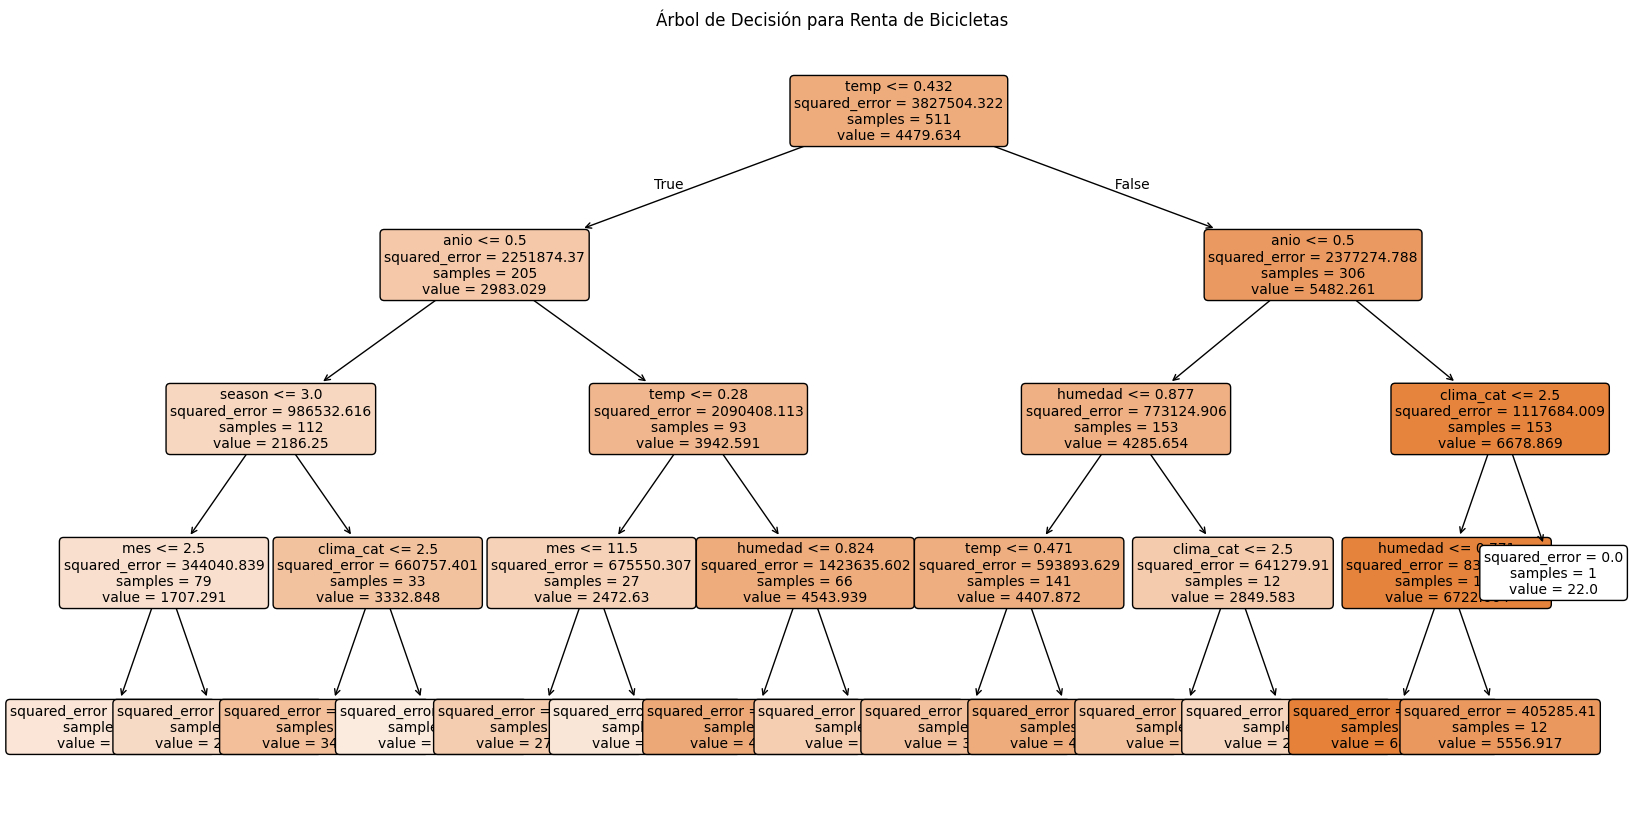

In [7]:
plt.figure(figsize=(20,10))
plot_tree(arbol, 
          feature_names=variables_predictoras, 
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Árbol de Decisión para Renta de Bicicletas")
plt.show()

In [8]:
# Hacemos predicciones con el examen final (test set)
predicciones = arbol.predict(X_test)

# Calculamos el error (R2 Score: 1.0 es perfecto, 0.0 es pésimo)
score = r2_score(y_test, predicciones)
print(f"Calificación del modelo (R2): {score:.2f}")

# Ejemplo de predicción real
print(f"El modelo predijo: {predicciones[0]:.0f} bicis. Valor real: {y_test.iloc[0]}")

Calificación del modelo (R2): 0.70
El modelo predijo: 3476 bicis. Valor real: 3649


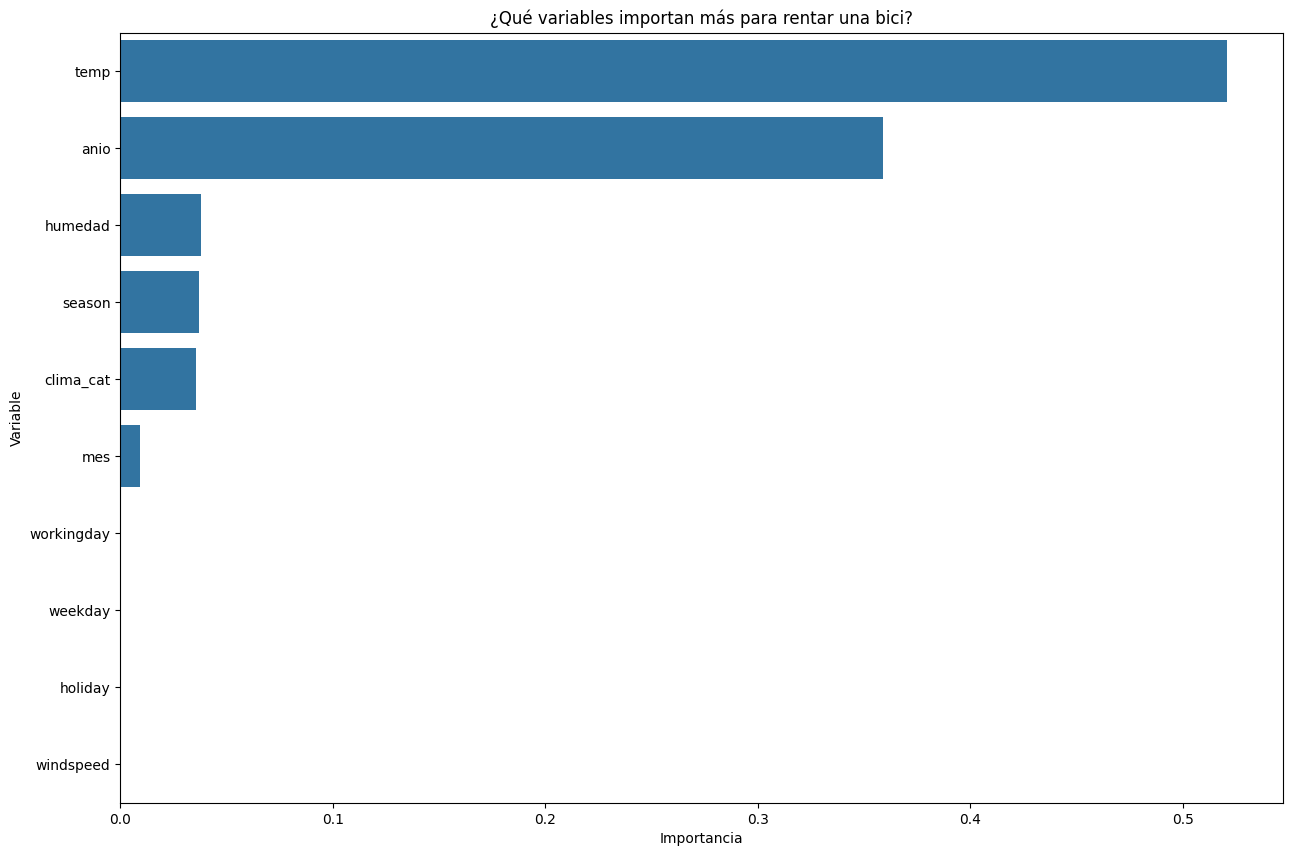

In [10]:
import seaborn as sns

importancias = pd.DataFrame({
    'Variable': variables_predictoras,
    'Importancia': arbol.feature_importances_
}).sort_values('Importancia', ascending=False)

sns.barplot(x='Importancia', y='Variable', data=importancias)
plt.title("¿Qué variables importan más para rentar una bici?")
plt.show()